In [5]:
# Load libraries
# Import all package
import numpy as np                 # For numerical operations
import pandas as pd                # For data manipulation and analysis
import matplotlib.pyplot as plt    # For creating static, animated, and interactive visualizations
import seaborn as sns              # For statistical data visualization
import sklearn as skl              # For machine learning algorithms
import statsmodels.api as sm       # For statistical modeling
import panel as pn                 # For creating interactive dashboards
import plotly.graph_objects as go  # For interactive visualizations
import scipy as sp                 # For scientific and technical computing
import os                          # For interacting with the operating system
import random                      # For generating random numbers
import hvplot.pandas               # For generating charts with hvplot
pn.extension()                     # Loads Panel extension for use in a notebook

In [38]:
import pandas as pd

# Use the correct CSV export URL
url = "https://docs.google.com/spreadsheets/d/1p5brh-pD_B73Pi9vqCVo4iuRnx_3XH3J/export?format=csv"

# Read the CSV data directly into a DataFrame
df = pd.read_csv(url)
print(df.head())


  Product Name                                   Company Export Country  \
0       Rubber                  Farmgate Nigeria Limited        Austria   
1     Palm Oil        Prime Agro Exports Nigeria Limited        Germany   
2      Cassava                  Farmgate Nigeria Limited        Germany   
3       Rubber  Nigerian Export Promotion Council (NEPC)        Belgium   
4       Sesame               Nigeria Agro Export Company         France   

         Date  Units Sold  unit_price  Profit per unit  Export Value  \
0  16/11/2023         721    31443.05          5863.92   22670439.05   
1    8/1/2021         881    23151.97          5868.73   20396885.57   
2  14/10/2020         702    18536.45          5105.01   13012587.90   
3  31/12/2022         191    21981.31          7781.54    4198430.21   
4  19/12/2022         373    13415.94          9590.95    5004145.62   

  Destination Port Transportation Mode  
0            Lagos                 Sea  
1            Lagos                

In [7]:
# 2. Clean and Preprocess the Data
# Check for missing values:
print(df.isnull().sum())

Product Name           0
Company                0
Export Country         0
Date                   0
Units Sold             0
unit_price             0
Profit per unit        0
Export Value           0
Destination Port       0
Transportation Mode    0
dtype: int64


In [8]:
df.dropna(inplace=True)  # Or use fillna() if appropriate

In [39]:
df['Date'] = pd.to_datetime(df['Date'])

/tmp/ipykernel_158/2394721818.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


In [10]:
print(df.columns)

Index(['Product Name', 'Company', 'Export Country', 'Date', 'Units Sold',
       'unit_price', 'Profit per unit', 'Export Value', 'Destination Port',
       'Transportation Mode'],
      dtype='object')


In [11]:
# Basic Analysis Based on Objectives:
#1. Total Units Sold by Product Name
# Identify which product has the highest total units sold.
product_sales = df.groupby('Product Name')['Units Sold'].sum().sort_values(ascending=False)
print(product_sales)


Product Name
Sesame      76132
Cocoa       76129
Cashew      70833
Rubber      66641
Plantain    64863
Cassava     64234
Palm Oil    63879
Ginger      54093
Name: Units Sold, dtype: int64


In [12]:
# 2. Company Contribution
# Find the company that exported the most units and calculate percentage contributions.
company_sales = df.groupby('Company')['Units Sold'].sum()
company_percentage = (company_sales / company_sales.sum()) * 100
print(company_percentage)

Company
Agriplus Nigeria Limited                      9.712856
Agro Allied Exporters Nigeria Limited         8.793526
Agro Export Nigeria Ltd                      11.166832
Farmgate Nigeria Limited                      9.688825
Golden Farms Nigeria Limited                 11.312136
Greenfield Agro Exporters Nigeria Limited     9.432307
Nigeria Agro Export Company                  10.193106
Nigerian Export Promotion Council (NEPC)     10.401003
Prime Agro Exports Nigeria Limited            9.693482
Solid Agro Nigeria Limited                    9.605927
Name: Units Sold, dtype: float64


In [13]:
# 2. Company Contribution
# Find the company that exported the most units and calculate percentage contributions.
company_sales = df.groupby('Company')['Units Sold'].sum()
company_percentage = ((company_sales / company_sales.sum()) * 100).sort_values(ascending=False)
print(company_percentage)

Company
Golden Farms Nigeria Limited                 11.312136
Agro Export Nigeria Ltd                      11.166832
Nigerian Export Promotion Council (NEPC)     10.401003
Nigeria Agro Export Company                  10.193106
Agriplus Nigeria Limited                      9.712856
Prime Agro Exports Nigeria Limited            9.693482
Farmgate Nigeria Limited                      9.688825
Solid Agro Nigeria Limited                    9.605927
Greenfield Agro Exporters Nigeria Limited     9.432307
Agro Allied Exporters Nigeria Limited         8.793526
Name: Units Sold, dtype: float64


In [14]:
# 2. Company Contribution
# Find the company that exported the most units and calculate percentage contributions.
company_sales = df.groupby('Company')['Units Sold'].sum()
company_percentage = ((company_sales / company_sales.sum()) * 100).idxmax()
print(company_percentage)

Golden Farms Nigeria Limited


In [15]:
# 3. Top Destination Ports
# Identify the ports with the highest units sold.
top_ports = df.groupby('Destination Port')['Units Sold'].sum().sort_values(ascending=False)
print(top_ports)

Destination Port
Lagos            316417
Warri             79336
Port Harcourt     70736
Calabar           70315
Name: Units Sold, dtype: int64


In [16]:
# 4. Average Unit Price per Product
# Calculate the average unit price for each product.
avg_price = df.groupby('Product Name')['unit_price'].mean()
print(avg_price)

Product Name
Cashew      29305.853237
Cassava     28566.641833
Cocoa       31227.870000
Ginger      29061.767327
Palm Oil    30126.338306
Plantain    30200.084754
Rubber      31673.915680
Sesame      29678.281729
Name: unit_price, dtype: float64


In [17]:
# Sales Performance Analysis:
# 5. Highest Export Value
# Find the product or company with the highest export value.
export_value = df.groupby(['Product Name', 'Company'])['Export Value'].sum().idxmax()
print(export_value)

('Rubber', 'Farmgate Nigeria Limited')


In [18]:
# Sales Performance Analysis:
# 5b. Highest Export Value
# Find the product or company with the highest export value.
export_value = df.groupby(['Product Name', 'Company'])['Export Value'].sum().sort_values(ascending=False)
print(export_value)

Product Name  Company                                 
Rubber        Farmgate Nigeria Limited                    3.541048e+08
Ginger        Agro Export Nigeria Ltd                     3.411771e+08
Cashew        Nigeria Agro Export Company                 3.329232e+08
Plantain      Nigeria Agro Export Company                 3.218357e+08
Cocoa         Nigerian Export Promotion Council (NEPC)    3.140842e+08
                                                              ...     
Ginger        Nigeria Agro Export Company                 1.056350e+08
              Golden Farms Nigeria Limited                8.374616e+07
              Agro Allied Exporters Nigeria Limited       7.644122e+07
Cashew        Agro Allied Exporters Nigeria Limited       7.009158e+07
Sesame        Farmgate Nigeria Limited                    6.922448e+07
Name: Export Value, Length: 80, dtype: float64


In [19]:
# 6. Profitability by Product
# Calculate total profit and profit per unit.
# Total Profit=(Profit per unit)×(Units Sold)
df['Total Profit'] = df['Profit per unit'] * df['Units Sold']

# Group by product name and sum the total profit
product_profit = df.groupby('Product Name')['Total Profit'].sum().sort_values(ascending=False)
print(product_profit)

Product Name
Sesame      4.774870e+08
Cocoa       4.503514e+08
Cashew      4.386243e+08
Cassava     4.165035e+08
Rubber      3.957313e+08
Plantain    3.877363e+08
Palm Oil    3.853921e+08
Ginger      3.366232e+08
Name: Total Profit, dtype: float64


In [20]:
# 6b. Profitability by Product
# Calculate total profit and profit per unit.
# Total Profit=(Profit per unit)×(Units Sold)
df['Total Profit'] = df['Profit per unit'] * df['Units Sold']

# Group by product name and sum the total profit
product_profit = df.groupby('Product Name')['Total Profit'].sum()

# Find the product with the highest total profit
top_product = product_profit.idxmax()  # Product with highest total profit
top_profit = product_profit.max()     # Highest total profit

print(f"The product with the highest total profit is {top_product} with a total profit of {top_profit:.2f}.")

The product with the highest total profit is Sesame with a total profit of 477487002.59.


The product with the highest total profit is Sesame with a total profit of 477487002.59.


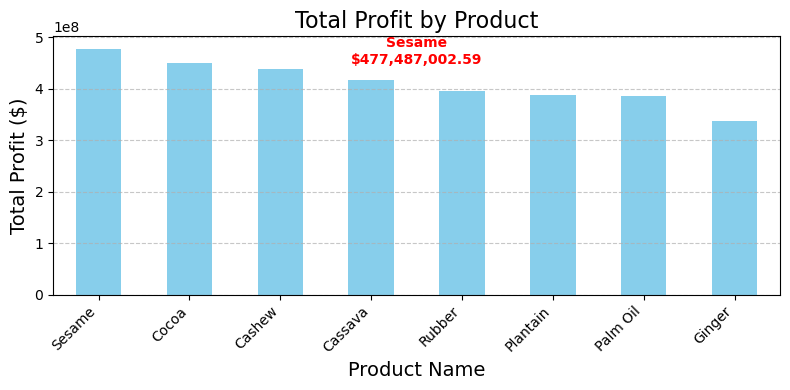

In [45]:
# 6c. Profitability by Product
# Calculate total profit and profit per unit.
# Total Profit=(Profit per unit)×(Units Sold)

import pandas as pd
import matplotlib.pyplot as plt

# Calculate total profit
df['Total Profit'] = df['Profit per unit'] * df['Units Sold']

# Group by product name and sum the total profit
product_profit = df.groupby('Product Name')['Total Profit'].sum()

# Find the product with the highest total profit
top_product = product_profit.idxmax()  # Product with highest total profit
top_profit = product_profit.max()      # Highest total profit

print(f"The product with the highest total profit is {top_product} with a total profit of {top_profit:.2f}.")

# Plotting the bar chart
plt.figure(figsize=(8, 4))
product_profit.sort_values(ascending=False).plot(kind='bar', color='skyblue')

# Customize the chart
plt.title('Total Profit by Product', fontsize=16)
plt.xlabel('Product Name', fontsize=14)
plt.ylabel('Total Profit ($)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Find the midpoint for annotation
mid_x = len(product_profit) / 2 - 0.5  # Center the annotation within bars

# Annotate the top product inside the plot at the top center
plt.text(
    x=mid_x,
    y=top_profit + (top_profit * 0.05),  # Slightly below the plot’s top limit
    s=f'{top_product}\n${top_profit:,.2f}', 
    ha='center', 
    va='top',  # Align text vertically from the top
    fontsize=10, 
    color='red',
    fontweight='bold'
)


# Save the plot as a .png file
plt.savefig('total_profit_by_product.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.tight_layout()
plt.show()


In [21]:
# 7. Export by Country:
# Which export country contributes the most to the total export value?
# Group by 'Export Country' and sum the 'Export Value'
country_export_value = df.groupby('Export Country')['Export Value'].sum()

# Sort the countries by total export value in descending order
country_export_value_sorted = country_export_value.sort_values(ascending=False)

# Display the country with the highest export value
top_country = country_export_value_sorted.idxmax()
top_value = country_export_value_sorted.max()
print(country_export_value_sorted)
print(f"The export country contributing the most is {top_country} with an export value of {top_value:.2f}.")

Export Country
Italy          1.962587e+09
Denmark        1.831246e+09
France         1.805864e+09
Switzerland    1.663790e+09
Belgium        1.605707e+09
Netherlands    1.534358e+09
Austria        1.530521e+09
Sweden         1.497263e+09
Spain          1.489989e+09
Germany        1.396341e+09
Name: Export Value, dtype: float64
The export country contributing the most is Italy with an export value of 1962586623.20.


In [22]:
# Date and Time-Based Analysis:
# 8. Yearly Trends
# Analyze units sold each year.
# Which year had the highest export activity?

# Extract the year from the 'Date' column
df['Year'] = df['Date'].dt.year

# Group by year and sum the units sold
yearly_trends = df.groupby('Year')['Units Sold'].sum()

# Find the year with the highest total units sold
top_year = yearly_trends.idxmax()
top_units_sold = yearly_trends.max()

# Display the results
print(yearly_trends)
print(f"The year that had the highest export activity is {top_year} with a total unit sold value of {top_units_sold:.2f}.")

Year
2020    132765
2021    142577
2022    125872
2023    135590
Name: Units Sold, dtype: int64
The year that had the highest export activity is 2021 with a total unit sold value of 142577.00.


In [23]:
# 9. Monthly Trends
# Break down exports by month or quarter.
df['Month'] = df['Date'].dt.month
monthly_trends = df.groupby('Month')['Units Sold'].sum()
print(monthly_trends)

Month
1     38923
2     45007
3     49685
4     39808
5     43301
6     46776
7     48572
8     42738
9     37804
10    47568
11    50137
12    46485
Name: Units Sold, dtype: int64


In [24]:
# 9b. Monthly/Quarterly Trends
# Break down exports by month or quarter.# Extract month names
# Convert Month Numbers to Names: Use the strftime function to extract the month name:
df['Month'] = df['Date'].dt.strftime('%B')

# Define the function to map months to quarters
def get_quarter(month):
    if month in [1, 2, 3]:
        return 'Q1'
    elif month in [4, 5, 6]:
        return 'Q2'
    elif month in [7, 8, 9]:
        return 'Q3'
    else:
        return 'Q4'

# Extract Year and Month
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.strftime('%B')  # Month as name (January, February, etc.)

# Extract the quarter from the 'Date' column
df['Quarter'] = df['Date'].dt.to_period('Q')

# Group by both Year and Month, then sum the units sold
monthly_trends = df.groupby(['Year', 'Month'])['Units Sold'].sum()
# Group by both Year and quarter, then sum the units sold
quarterly_trends = df.groupby(['Year', 'Quarter'])['Units Sold'].sum()


# Print the trends
print(monthly_trends)
print(quarterly_trends)

Year  Month    
2020  April         9612
      August       12032
      December     11656
      February      7955
      January      11444
      July         16365
      June         10160
      March        10608
      May           8222
      November     14115
      October       8941
      September    11655
2021  April        10667
      August        7062
      December     16664
      February     14863
      January       5707
      July         10100
      June         13371
      March        17352
      May          11217
      November     12028
      October      18680
      September     4866
2022  April         9751
      August       11462
      December      6655
      February     11248
      January      11059
      July         12693
      June         13748
      March        11391
      May          12933
      November      8481
      October       8288
      September     8163
2023  April         9778
      August       12182
      December     11510
      Feb

In [25]:
# 9c. Monthly/Quarterly Trends
# Break down exports by month or quarter.# Extract month names# Sort by Calendar Order:
# Since grouping by month names sorts alphabetically, to sort them by the actual order of months I used a CategoricalDtype.
import pandas as pd

# Define the function to map months to quarters
def get_quarter(month):
    if month in [1, 2, 3]:
        return 'Q1'
    elif month in [4, 5, 6]:
        return 'Q2'
    elif month in [7, 8, 9]:
        return 'Q3'
    else:
        return 'Q4'

# Define the correct month order (full month names)
month_order = pd.CategoricalDtype(
    ['January', 'February', 'March', 'April', 'May', 'June', 
     'July', 'August', 'September', 'October', 'November', 'December'],
    ordered=True
)

# Assuming 'df' already has a Date column in datetime format
df['Month'] = df['Date'].dt.strftime('%B')  # Extract month names as strings (January, February, etc.)

# Convert 'Month' column to the defined categorical type for sorting
df['Month'] = df['Month'].astype(month_order)

# Apply the function to create a new 'Quarter' column
df['Quarter'] = df['Date'].dt.quarter  # Or use the previously defined 'get_quarter' function if preferred

# Re-group and sort based on calendar order
monthly_trends = df.groupby('Month')['Units Sold'].sum().sort_index()
quarterly_trends = df.groupby('Quarter')['Units Sold'].sum()

# Print the trends
print("Monthly Trends:")
print(monthly_trends)

print("\nQuarterly Trends:")
print(quarterly_trends)


Monthly Trends:
Month
January      38923
February     45007
March        49685
April        39808
May          43301
June         46776
July         48572
August       42738
September    37804
October      47568
November     50137
December     46485
Name: Units Sold, dtype: int64

Quarterly Trends:
Quarter
1    133615
2    129885
3    129114
4    144190
Name: Units Sold, dtype: int64


/tmp/ipykernel_158/403754838.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_trends = df.groupby('Month')['Units Sold'].sum().sort_index()


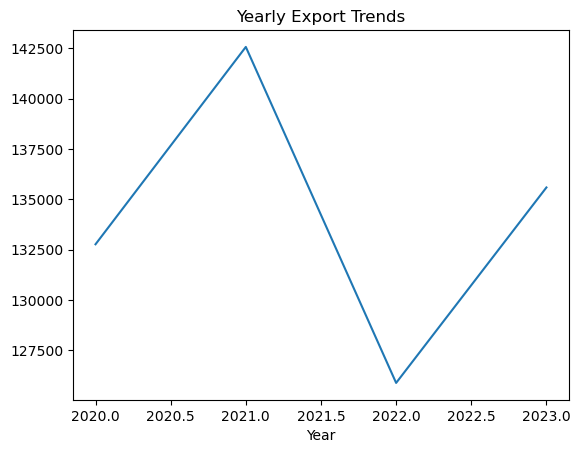

In [26]:
# Data Visualization:
# 10. Sales Trends Visualization:
# Create a line chart to visualize the trend in export values over time.
# Can you spot any seasonality in exports?

# Use matplotlib and seaborn to create charts:
# Line Chart for Trends:
import matplotlib.pyplot as plt

yearly_trends.plot(kind='line')
plt.title('Yearly Export Trends')
plt.show()


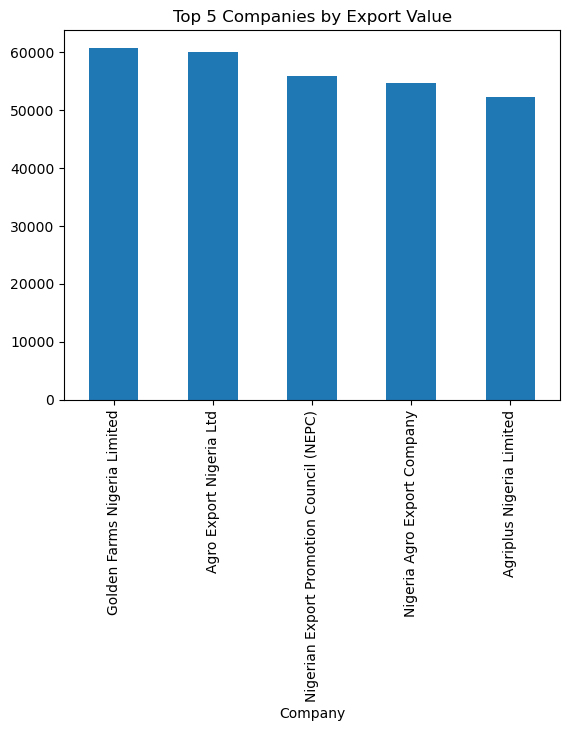

In [27]:
# 11. Top 5 Companies by Export Value:
# Use a bar chart to visualize the top 5 companies by export value.
company_sales = df.groupby('Company')['Units Sold'].sum()
company_sales.nlargest(5).plot(kind='bar')
plt.title('Top 5 Companies by Export Value')
plt.show()

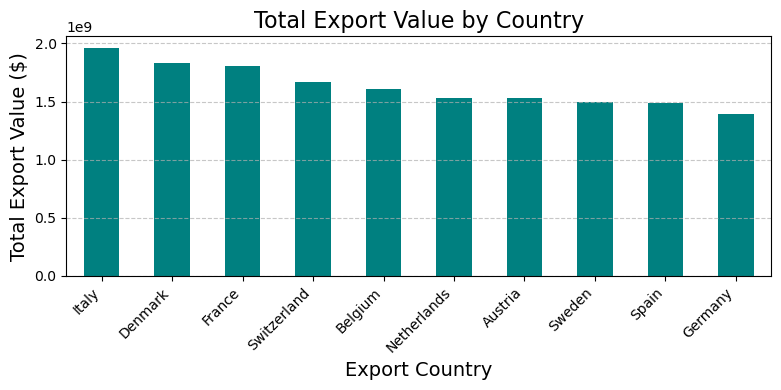

In [49]:
# 11b. Plot of Countries by Export Value:
# Use a bar chart to visualize the countries by export value.import matplotlib.pyplot as plt

# Group by export country and sum the export values
country_export_value = df.groupby('Export Country')['Export Value'].sum().sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(8, 4))
country_export_value.plot(kind='bar', color='teal')

# Customize the chart
plt.title('Total Export Value by Country', fontsize=16)
plt.xlabel('Export Country', fontsize=14)
plt.ylabel('Total Export Value ($)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


In [50]:
# Check the number of unique products exported to each country
product_per_country = df.groupby('Export Country')['Product Name'].nunique()

print(product_per_country)


Export Country
Austria        8
Belgium        8
Denmark        8
France         8
Germany        8
Italy          8
Netherlands    8
Spain          8
Sweden         8
Switzerland    8
Name: Product Name, dtype: int64


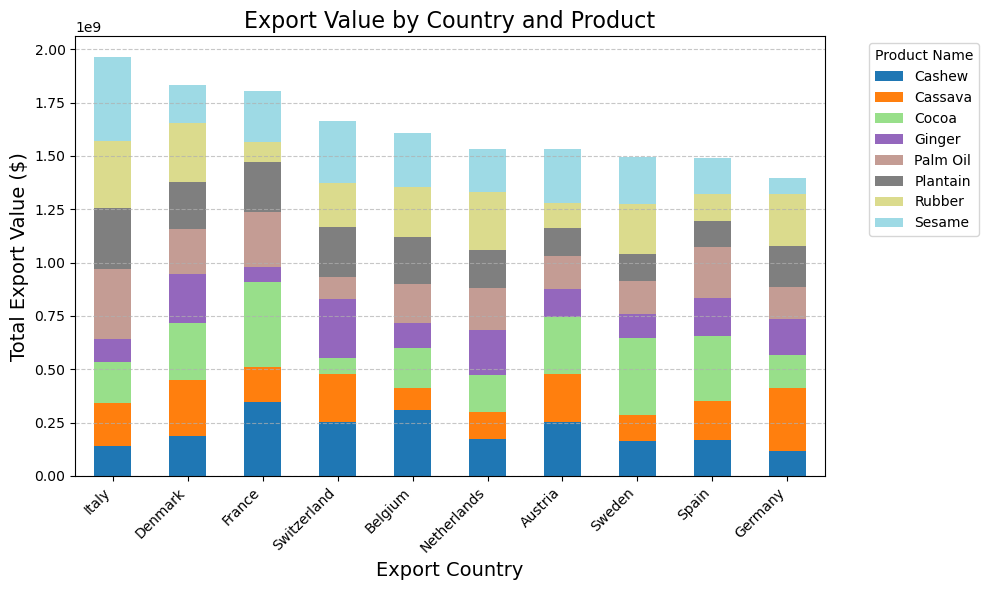

In [54]:
import matplotlib.pyplot as plt

# Pivot the data to create a table of countries, products, and export values
pivot_table = df.pivot_table(values='Export Value', index='Export Country', columns='Product Name', aggfunc='sum')

# Fill NaN with 0 and sort by total export value across all products
pivot_table = pivot_table.fillna(0).assign(Total=pivot_table.sum(axis=1)).sort_values(by='Total', ascending=False).drop(columns='Total')

# Plot the stacked bar chart
pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')

# Customize the chart
plt.title('Export Value by Country and Product', fontsize=16)
plt.xlabel('Export Country', fontsize=14)
plt.ylabel('Total Export Value ($)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Product Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and show plot
plt.tight_layout()

# Save the plot as a .png file
plt.savefig('export_value_by_country_and_product.png', dpi=300, bbox_inches='tight')

plt.show()


Index(['Product Name', 'Company', 'Export Country', 'Date', 'Units Sold',
       'unit_price', 'Profit per unit', 'Export Value', 'Destination Port',
       'Transportation Mode', 'Total Profit', 'Year', 'Month', 'Quarter'],
      dtype='object')


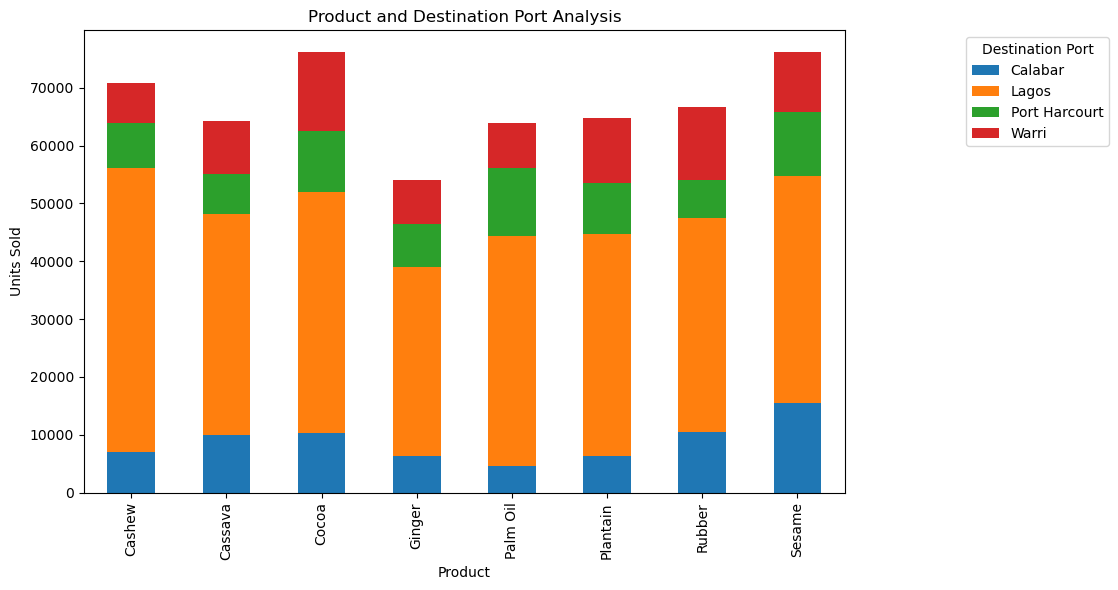

In [28]:
# 12b. Product and Destination Port Analysis:
# Use a stacked bar chart to visualize which product is exported the most to which destination port.import pandas as pd
import matplotlib.pyplot as plt

# Check column names for any discrepancies
print(df.columns)

# Strip spaces from column names (if any)
df.columns = df.columns.str.strip()

# Generate a pivot table for product and destination port analysis
pivot_table = df.pivot_table(values='Units Sold', index='Product Name', columns='Destination Port', aggfunc='sum')

# Plot the stacked bar chart
ax = pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6))

# Customize plot
plt.title('Product and Destination Port Analysis')
plt.xlabel('Product')
plt.ylabel('Units Sold')

# Move the legend fully outside the plot area
ax.legend(loc='upper left', bbox_to_anchor=(1.15, 1), title='Destination Port')

# Adjust layout to prevent clipping of labels and legend
plt.tight_layout()

# Add extra space for the legend using subplots_adjust
plt.subplots_adjust(right=0.85)

# Save the plot as a .png file
plt.savefig('product_and_destination_port_analysis.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

['Sea']
                     Units Sold  Export Value
Transportation Mode                          
Sea                      536804  1.631766e+10


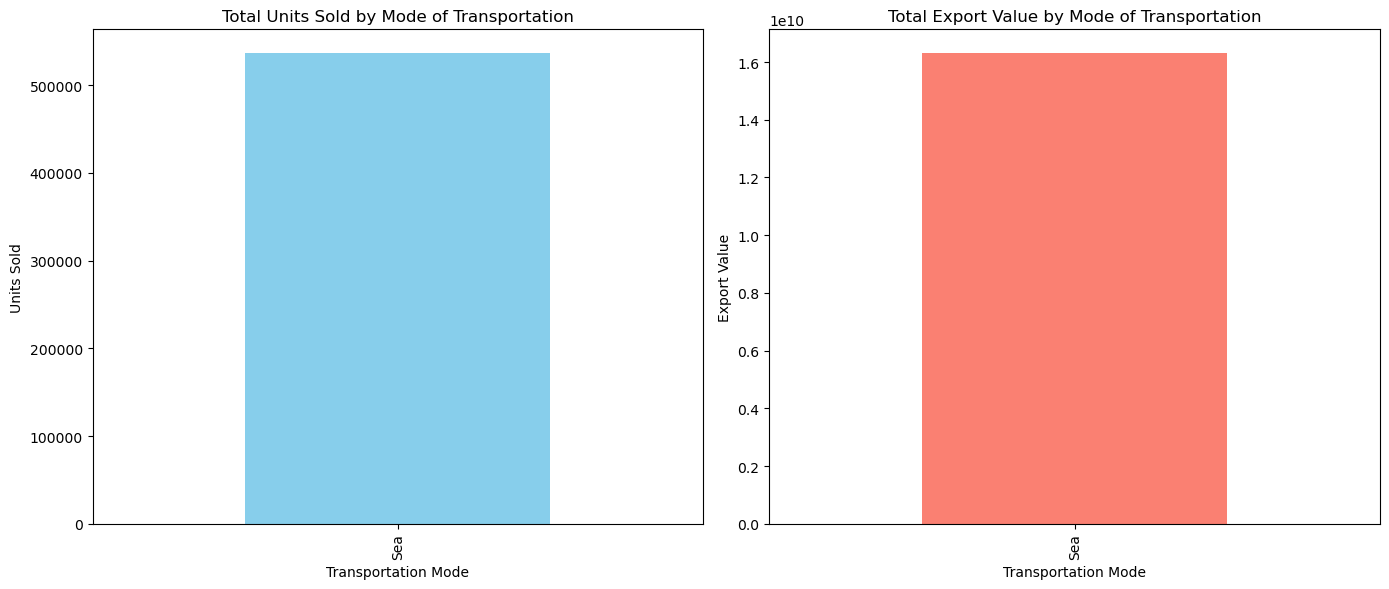

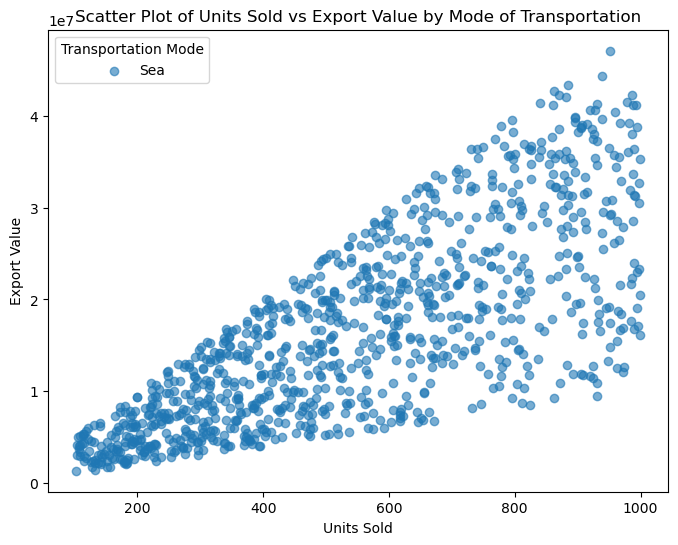

In [29]:
# Further Insights:
# 13. Mode of Transportation:
# Analyze if there's any pattern between the mode of transportation and the export value or units sold.
import pandas as pd
import matplotlib.pyplot as plt

# Ensure that the 'Mode of Transportation' column and the relevant columns are present in the dataframe
# Check for any missing values or discrepancies
print(df['Transportation Mode'].unique())  # To see all unique values in the 'Transportation Mode' column

# Group by 'Mode of Transportation' and calculate total 'Units Sold' and 'Export Value'
transportation_analysis = df.groupby('Transportation Mode')[['Units Sold', 'Export Value']].sum()

# Print the aggregated data
print(transportation_analysis)

# Plot the relationship between 'Mode of Transportation' and 'Units Sold'
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot for Units Sold by Mode of Transportation
transportation_analysis['Units Sold'].plot(kind='bar', ax=ax[0], color='skyblue', title='Total Units Sold by Mode of Transportation')
ax[0].set_ylabel('Units Sold')

# Bar plot for Export Value by Mode of Transportation
transportation_analysis['Export Value'].plot(kind='bar', ax=ax[1], color='salmon', title='Total Export Value by Mode of Transportation')
ax[1].set_ylabel('Export Value')

plt.tight_layout()
plt.show()

# Optionally, if you want to investigate further, you could plot scatter plots to examine the correlation between 'Units Sold' and 'Export Value' for each mode
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plot of Units Sold vs Export Value
for mode in df['Transportation Mode'].unique():
    mode_data = df[df['Transportation Mode'] == mode]
    ax.scatter(mode_data['Units Sold'], mode_data['Export Value'], label=mode, alpha=0.6)

ax.set_xlabel('Units Sold')
ax.set_ylabel('Export Value')
ax.set_title('Scatter Plot of Units Sold vs Export Value by Mode of Transportation')
ax.legend(title='Transportation Mode')
plt.show()

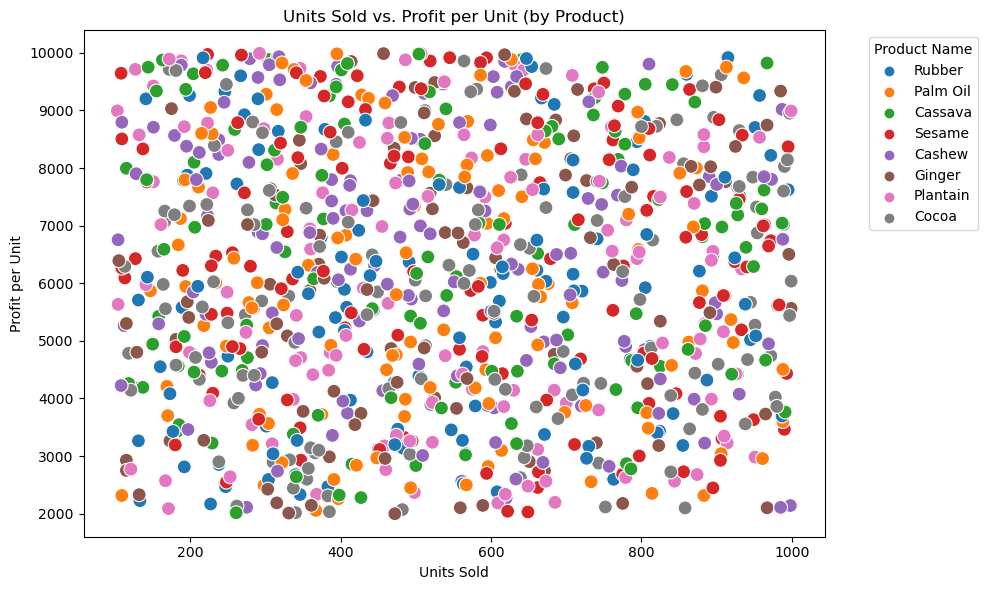

Correlation coefficient: 0.00
P-value: 9.84e-01
There is no statistically significant correlation.


In [30]:
# 14. Profit vs. Units Sold:
# Is there a correlation between the number of units sold and the profit per unit across different products or companies?
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Calculate profit per unit (if not already present)
# df['Profit per unit'] = df['Export Value'] / df['Units Sold']  # If required

# Scatter plot of Units Sold vs. Profit per Unit
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Units Sold', y='Profit per unit', hue='Product Name', palette='tab10', s=100)
plt.title('Units Sold vs. Profit per Unit (by Product)')
plt.xlabel('Units Sold')
plt.ylabel('Profit per Unit')
plt.legend(title='Product Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Calculate correlation between Units Sold and Profit per Unit
corr, p_value = pearsonr(df['Units Sold'], df['Profit per unit'])

print(f"Correlation coefficient: {corr:.2f}")
print(f"P-value: {p_value:.2e}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant correlation.")
else:
    print("There is no statistically significant correlation.")

In [31]:
# Alternative Analyses and Their Value for Stakeholder
#1. Product Performance Analysis
# Objective: Analyze total export value and units sold for each product. Identify the most profitable products.
# Group by Product Name to calculate total export value and units sold
product_performance = df.groupby('Product Name')[['Units Sold', 'Export Value']].sum().sort_values(by='Export Value', ascending=False)

# Calculate total profit by product
df['Total Profit'] = df['Profit per unit'] * df['Units Sold']
product_profit = df.groupby('Product Name')['Total Profit'].sum().sort_values(ascending=False)

# Print results
print(product_performance)
print(product_profit)

              Units Sold  Export Value
Product Name                          
Cocoa              76129  2.384889e+09
Sesame             76132  2.268608e+09
Rubber             66641  2.118010e+09
Cashew             70833  2.110679e+09
Palm Oil           63879  1.974586e+09
Plantain           64863  1.947170e+09
Cassava            64234  1.913308e+09
Ginger             54093  1.600416e+09
Product Name
Sesame      4.774870e+08
Cocoa       4.503514e+08
Cashew      4.386243e+08
Cassava     4.165035e+08
Rubber      3.957313e+08
Plantain    3.877363e+08
Palm Oil    3.853921e+08
Ginger      3.366232e+08
Name: Total Profit, dtype: float64


              Units Sold  Export Value
Product Name                          
Cocoa              76129  2.384889e+09
Sesame             76132  2.268608e+09
Rubber             66641  2.118010e+09
Cashew             70833  2.110679e+09
Palm Oil           63879  1.974586e+09
Plantain           64863  1.947170e+09
Cassava            64234  1.913308e+09
Ginger             54093  1.600416e+09
Product Name
Sesame      4.774870e+08
Cocoa       4.503514e+08
Cashew      4.386243e+08
Cassava     4.165035e+08
Rubber      3.957313e+08
Plantain    3.877363e+08
Palm Oil    3.853921e+08
Ginger      3.366232e+08
Name: Total Profit, dtype: float64


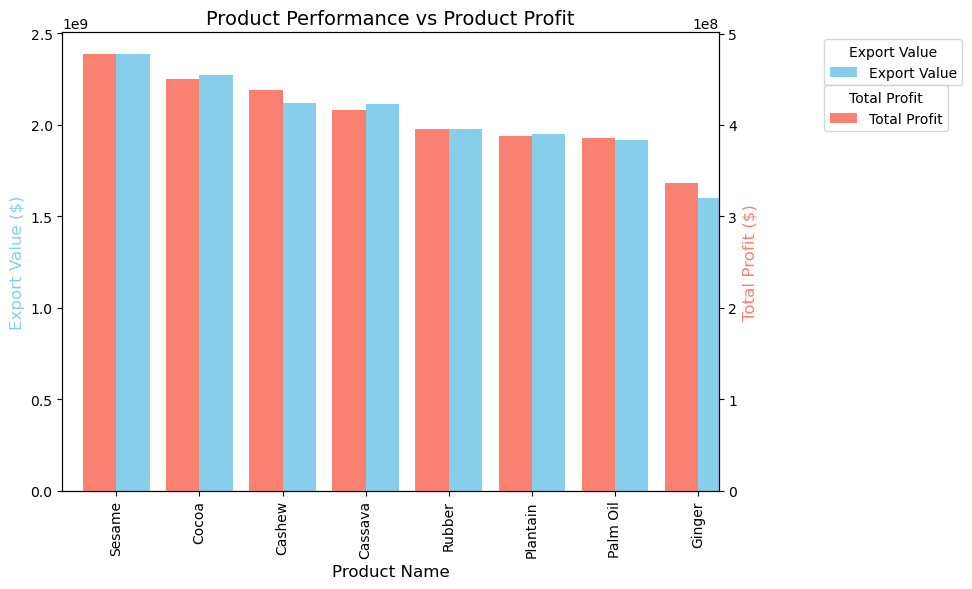

In [32]:
# Alternative Analyses and Their Value for Stakeholder
#1. Product Performance Analysis
# Objective: Analyze total export value and units sold for each product. Identify the most profitable products.
# Value to Stakeholders: Strategic Focus: Helps stakeholders prioritize products with the highest export value or profit margins. 
# Value to Stakeholders: Resource Allocation: Enables better allocation of resources (e.g., marketing, logistics) to top-performing products.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Group by Product Name to calculate total export value and units sold
product_performance = df.groupby('Product Name')[['Units Sold', 'Export Value']].sum().sort_values(by='Export Value', ascending=False)

# Calculate total profit by product
df['Total Profit'] = df['Profit per unit'] * df['Units Sold']
product_profit = df.groupby('Product Name')['Total Profit'].sum().sort_values(ascending=False)

# Print results
print(product_performance)
print(product_profit)

# Create a figure and axis for the dual-axis plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Export Value on the primary y-axis
product_performance['Export Value'].plot(kind='bar', ax=ax1, color='skyblue', label='Export Value', position=0, width=0.4)

# Set labels for the primary y-axis and x-axis
ax1.set_ylabel('Export Value ($)', color='skyblue', fontsize=12)
ax1.set_xlabel('Product Name', fontsize=12)

# Create a secondary y-axis for Total Profit
ax2 = ax1.twinx()
product_profit.plot(kind='bar', ax=ax2, color='salmon', label='Total Profit', position=1, width=0.4)

# Set labels for the secondary y-axis
ax2.set_ylabel('Total Profit ($)', color='salmon', fontsize=12)

# Set the title
plt.title('Product Performance vs Product Profit', fontsize=14)

# Rotate the x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Add legends for both axes, placing them on the right, stacked neatly
ax1.legend(loc='upper left', bbox_to_anchor=(1.15, 1), title="Export Value")
ax2.legend(loc='upper left', bbox_to_anchor=(1.15, 0.9), title="Total Profit")


# Adjust layout
plt.tight_layout()

# Save the plot as a .png file
plt.savefig('product_performance_vs_product_profit.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

                  Units Sold  Export Value
Destination Port                          
Lagos                 316417  9.738667e+09
Warri                  79336  2.347900e+09
Port Harcourt          70736  2.152910e+09
Calabar                70315  2.078188e+09


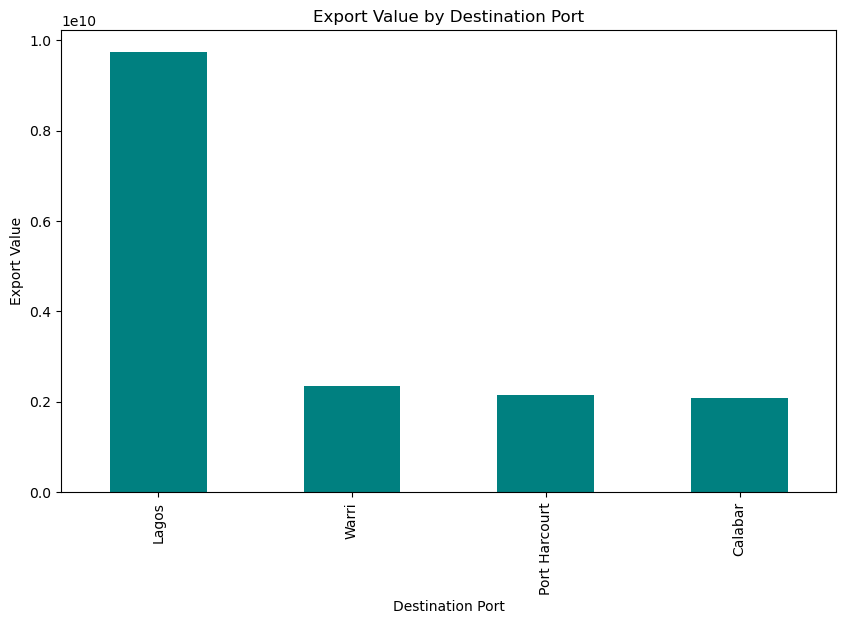

In [33]:
# 2. Destination Port Analysis
# Objective: Identify ports that handle the highest export volumes and values. Understand geographic distribution and potential bottlenecks.
# Group by Destination Port to calculate total export value and units sold
# Value to Stakeholders: Logistics Optimization: Insights into which ports handle the most exports can help optimize shipping routes.
# Value to Stakeholders: Market Expansion: Identifies regions with high demand, enabling targeted market expansion.
port_performance = df.groupby('Destination Port')[['Units Sold', 'Export Value']].sum().sort_values(by='Export Value', ascending=False)

# Print results
print(port_performance)

# Plot a bar chart
port_performance['Export Value'].plot(kind='bar', color='teal', title='Export Value by Destination Port', figsize=(10, 6))
plt.xlabel('Destination Port')
plt.ylabel('Export Value')

# Save the plot as a .png file
plt.savefig('export_value_by_destination_port.png', dpi=300, bbox_inches='tight')
plt.show()

Monthly Trends:
 Year  Month    
2020  April         9612
      August       12032
      December     11656
      February      7955
      January      11444
      July         16365
      June         10160
      March        10608
      May           8222
      November     14115
      October       8941
      September    11655
2021  April        10667
      August        7062
      December     16664
      February     14863
      January       5707
      July         10100
      June         13371
      March        17352
      May          11217
      November     12028
      October      18680
      September     4866
2022  April         9751
      August       11462
      December      6655
      February     11248
      January      11059
      July         12693
      June         13748
      March        11391
      May          12933
      November      8481
      October       8288
      September     8163
2023  April         9778
      August       12182
      December   

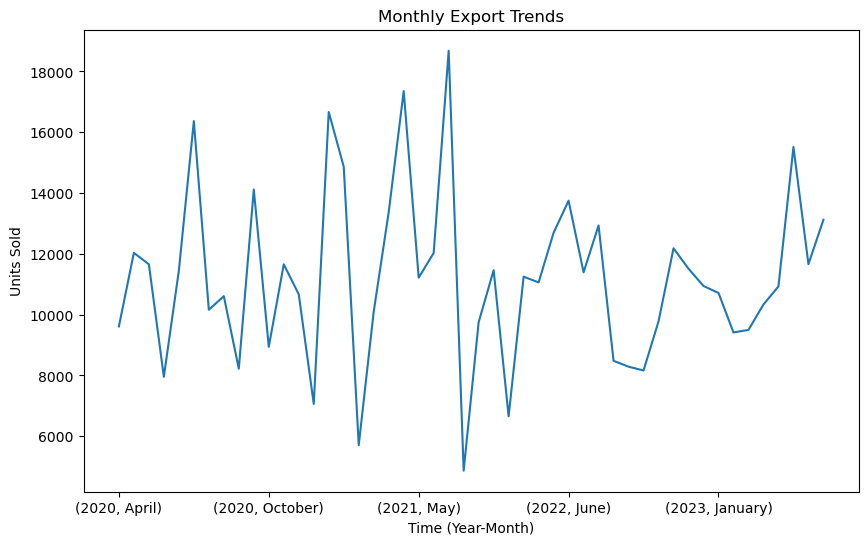

In [34]:
# 3. Time-Based Trends (Monthly and Quarterly)
# Objective: Analyze export patterns over time (monthly and quarterly). Identify peak and low-demand periods.
# Value to Stakeholders: Demand Forecasting: Helps in planning production and inventory based on seasonal demand patterns.
# Value to Stakeholders: Sales Strategies: Allows for targeted promotions during peak periods and strategic planning for slow months.
# Extract Year and Month
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.strftime('%B')

# Group by Year and Month
monthly_trends = df.groupby(['Year', 'Month'])['Units Sold'].sum()

# Group by Quarter
df['Quarter'] = df['Date'].dt.to_period('Q')
quarterly_trends = df.groupby(['Year', 'Quarter'])['Units Sold'].sum()

# Print results
print("Monthly Trends:\n", monthly_trends)
print("Quarterly Trends:\n", quarterly_trends)

# Plot trends
monthly_trends.plot(kind='line', title='Monthly Export Trends', figsize=(10, 6))
plt.xlabel('Time (Year-Month)')
plt.ylabel('Units Sold')

# Save the plot as a .png file
plt.savefig('monthly_export_trends.png', dpi=300, bbox_inches='tight')
plt.show()


Product Name
Sesame      4.774870e+08
Cocoa       4.503514e+08
Cashew      4.386243e+08
Cassava     4.165035e+08
Rubber      3.957313e+08
Plantain    3.877363e+08
Palm Oil    3.853921e+08
Ginger      3.366232e+08
Name: Total Profit, dtype: float64


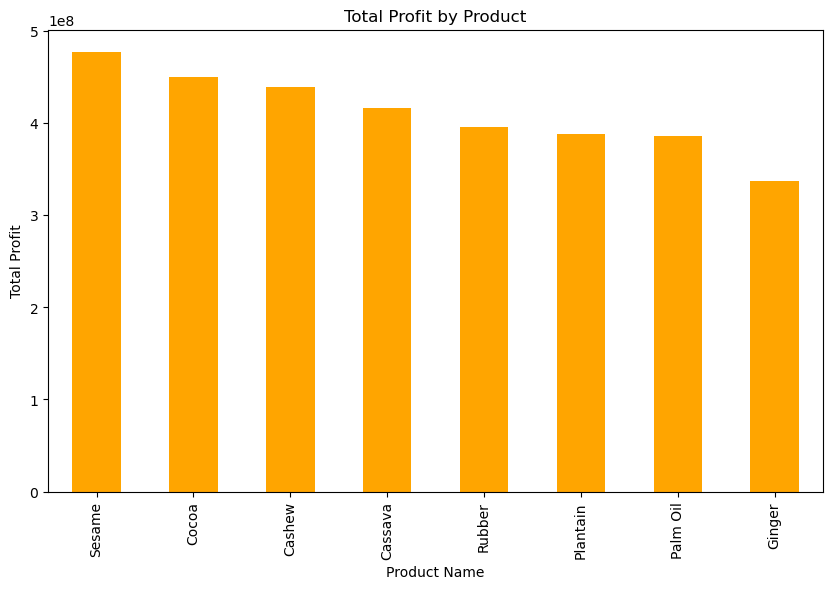

In [35]:
# 4. Profitability Analysis
# Objective: Analyze total and per-unit profit across products. Identify products with the highest profit margins.
# Value to Stakeholders: Revenue Maximization: Focuses efforts on high-profit products to maximize revenue.
# Value to Stakeholders: Cost Management: Identifies low-margin products for cost optimization or discontinuation.
# Calculate total profit by product
product_profit = df.groupby('Product Name')['Total Profit'].sum().sort_values(ascending=False)

# Print results
print(product_profit)

# Plot profit by product
product_profit.plot(kind='bar', color='orange', title='Total Profit by Product', figsize=(10, 6))
plt.xlabel('Product Name')
plt.ylabel('Total Profit')

# Save the plot as a .png file
plt.savefig('total_profit_by_product.png', dpi=300, bbox_inches='tight')
plt.show()

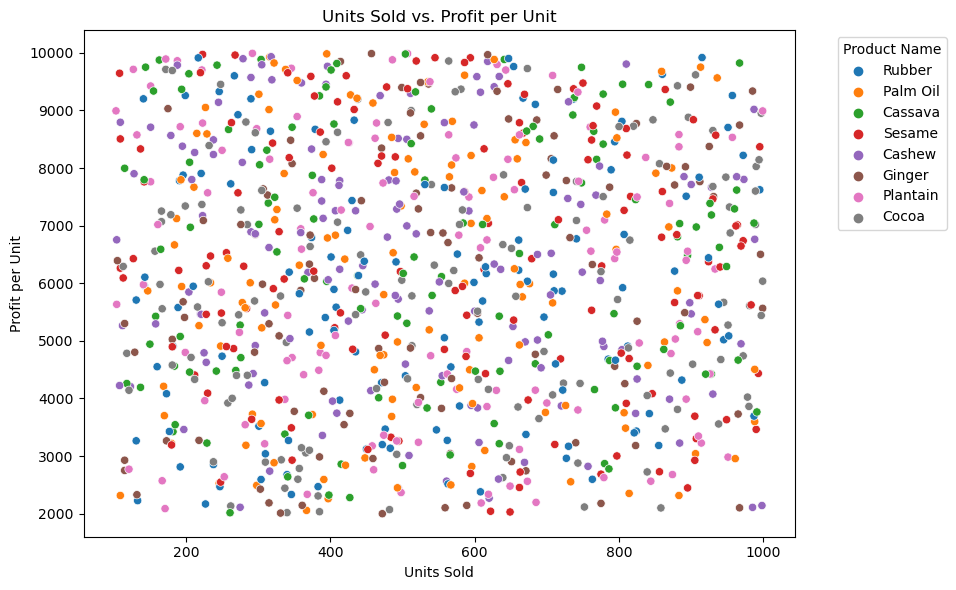

Correlation Coefficient: 0.00, P-value: 9.84e-01


In [36]:
# 5. Correlation Analysis: Units Sold vs. Profit per Unit
# Objective: Determine if there is a relationship between units sold and profit per unit.
# Value to Stakeholders: Pricing Strategy: Understand if bulk sales affect profit margins, enabling better pricing strategies.
# Value to Stakeholders: Sales Planning: Align sales strategies with profitability goals.
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Scatter plot with legend positioned outside
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Units Sold', y='Profit per unit', hue='Product Name')

# Set plot title and labels
plt.title('Units Sold vs. Profit per Unit')
plt.xlabel('Units Sold')
plt.ylabel('Profit per Unit')

# Move the legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), title='Product Name')

# Adjust layout to prevent clipping
plt.tight_layout()
plt.subplots_adjust(right=0.8)


# Save the plot as a .png file
plt.savefig('units_sold_vs_profit.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Correlation analysis
corr, p_value = pearsonr(df['Units Sold'], df['Profit per unit'])
print(f"Correlation Coefficient: {corr:.2f}, P-value: {p_value:.2e}")


Product Name
Cocoa       2.384889e+09
Sesame      2.268608e+09
Rubber      2.118010e+09
Cashew      2.110679e+09
Palm Oil    1.974586e+09
Plantain    1.947170e+09
Cassava     1.913308e+09
Ginger      1.600416e+09
Name: Revenue, dtype: float64


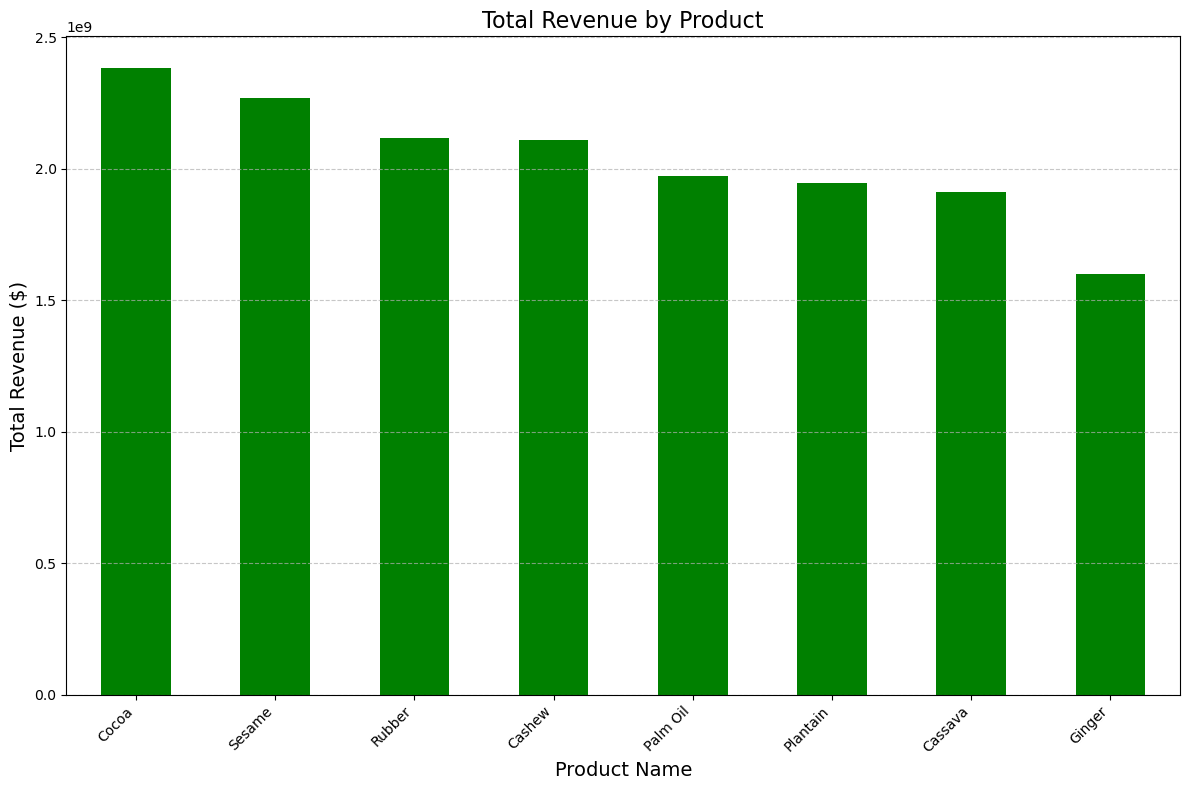

In [47]:
# Analyze the total revenue generated by each product, we can calculate the revenue as: Revenue = Units Sold × Unit Price
import pandas as pd
import matplotlib.pyplot as plt

# Calculate revenue for each row
df['Revenue'] = df['Units Sold'] * df['unit_price']

# Group by product name to get total revenue for each product
product_revenue = df.groupby('Product Name')['Revenue'].sum().sort_values(ascending=False)

# Print the results
print(product_revenue)

# Plot the revenue as a bar chart
plt.figure(figsize=(12, 8))
product_revenue.plot(kind='bar', color='green')

# Customize the chart
plt.title('Total Revenue by Product', fontsize=16)
plt.xlabel('Product Name', fontsize=14)
plt.ylabel('Total Revenue ($)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the plot as a .png file
plt.savefig('total_revenue_by_product.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.tight_layout()
plt.show()
